# Bigger Picture

We live in an era where information is flowing at breakneck speed. This can result in stress. Excessive stress may harm our health by causing headaches, high blood pressure, heart issues, diabetes, skin diseases, asthma, arthritis, depression, and anxiety. A collection of extensive multi-domain social media data from five distinct Reddit forums for recognizing stress. We offer an exploratory examination of a Reddit post dataset utilizing Latent Dirichlet Allocation (LDA) topic modeling and visualization, as well as a machine learning model to predict future posts, in this work. In this study, we examined the dataset using LDA to determine the number of topics and the proportion of words in each topic. The machine learning models have also been fine-tuned for the sentiment classification of two distinct classes: stress (1) and non-stress (0). 

The machine learning algorithms employed in this study include logistic regression, XGBoost, and SVM. To scrape posts for our test prediction, a web application is constructed with web scraping software for Reddit.



## About Dataset
#### Context
We live in an era where there is a surplus of information flowing in every second. Sometimes this leads to stress. ☹️
Too much stress can negatively impact our health and may lead to headaches, high blood pressure, heart problems, diabetes, skin conditions, asthma, arthritis, depression, and anxiety.

#### Content
A dataset of lengthy multi-domain social media data for identifying stress from five different categories of Reddit communities.



In [7]:
import pandas as pd

In [8]:
df_train = pd.read_csv('data/archive/dreaddit-train.csv')
df_train.head(2)

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.125,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857


,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.125,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857


In [9]:
df_test = pd.read_csv('data/archive/dreaddit-test.csv')
df_test.head(2)

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,1.514981e+09,22,-1.238793,...,1.0,1.200,1.0,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,1.493348e+09,5,7.684583,...,1.4,1.125,1.0,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909


,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,1.514981e+09,22,-1.238793,...,1.0,1.200,1.0,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,1.493348e+09,5,7.684583,...,1.4,1.125,1.0,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909


In [10]:
df = pd.concat([df_train, df_test])

df.head(2)

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1.521614e+09,5,1.806818,...,1.000,1.125,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1.527010e+09,4,9.429737,...,1.125,1.000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857


,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1.521614e+09,5,1.806818,...,1.000,1.125,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1.527010e+09,4,9.429737,...,1.125,1.000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857


In [11]:
df.tail(2)

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
713,assistance,90bila,"[8, 13]",Here's the link to my amazon wish list where t...,1164,0,0.6,1.532048e+09,18,0.236814,...,1.500,1.0,1.0,1.65132,1.53913,1.90766,0.74,2,2.365294,0.090000
714,assistance,7uueuc,"[5, 10]",How can I keep us protected? They have already...,1519,1,0.0,1.517605e+09,4,3.221250,...,1.125,1.0,1.0,1.66648,1.52500,1.90820,0.63,8,3.783250,0.136364


,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
713,assistance,90bila,"[8, 13]",Here's the link to my amazon wish list where t...,1164,0,0.6,1.532048e+09,18,0.236814,...,1.500,1.0,1.0,1.65132,1.53913,1.90766,0.74,2,2.365294,0.090000
714,assistance,7uueuc,"[5, 10]",How can I keep us protected? They have already...,1519,1,0.0,1.517605e+09,4,3.221250,...,1.125,1.0,1.0,1.66648,1.52500,1.90820,0.63,8,3.783250,0.136364


view text 

In [12]:
print('-'*100)
for i in range(3):
    print('[ text ]\n', df['text'].iloc[i])
    print('\n[ label ]', df['label'].iloc[i])
    print('-'*100)

----------------------------------------------------------------------------------------------------
[ text ]
 He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI'RE A HYPOCONDRIAC LIKE ME: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my "doom" to my gloom..I am now f'n worried about my heart. I do happen to have a physical in 48 hours.

[ label ] 1
----------------------------------------------------------------------------------------------------
[ text ]
 Hey there r/assistance, Not sure if this is the right place to post this.. but here goes =) I'm currently a student intern at Sandia National Labs and working on a survey to help improve our ma

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3553 entries, 0 to 714
Columns: 116 entries, subreddit to sentiment
dtypes: float64(107), int64(5), object(4)
memory usage: 3.2+ MB


In [13]:
# get text and label
texts = df['text']#.values
labels = df['label']#.values

But first preprocess text before

# Text preprocessing

preprocessing custom codes

In [14]:
# Lemmatization
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(words):
     
    return " ".join([lemmatizer.lemmatize(word) for word in words])


In [15]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re, string, nltk

def text_prepare(corpus):
    
    # split into tokens
    sentence_splitted = corpus.split()
    
     # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation)) # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in sentence_splitted]
    
    # turn token to lowercase, Remove stop words
    filtered_tokens = [token.lower() for token in tokens if token.lower() not in stopwords.words('english')]
    
    # Lemmatize the filtered tokens
    lemmatized_tokens = lemmatize_words(filtered_tokens)

    # return the filtered tokens
    return lemmatized_tokens


In [10]:
text_prepare(texts.iloc[0])

'said felt way suggeted go rest trigger ahead youire hypocondriac like decide look feeling doom hope maybe getting sucked rabbit hole ludicrous conspiracy stupid psychic test new age b something could even laugh road ended reading sense doom indicative various health ailment one prone top doom gloomi fn worried heart happen physical 48 hour'

In [16]:
cleaned_texts = [text_prepare(x) for x in texts]


In [106]:
cleaned_texts[-1]

'keep u protected already told unwelcome person live tried sneaking sleeping child home need keep protected cannot leave dont anywhere go money move moment option'

## Exploratory Analysis

In [19]:
df.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,3553.000000,3553.000000,3553.000000,3.553000e+03,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,...,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000
mean,13774.009288,0.522657,0.790644,1.517999e+09,19.543203,4.688569,85.929918,35.140816,40.437610,67.622440,...,1.086601,1.119619,1.000225,1.722884,1.535102,1.879306,0.846088,9.747819,5.458644,0.041667
std,17424.172858,0.499557,0.218379,1.552489e+07,87.263634,3.301673,32.105144,26.452202,31.449231,32.658996,...,0.115371,0.086195,0.006708,0.048044,0.102542,0.058354,0.174756,20.324300,2.526593,0.195195
min,2.000000,0.000000,0.000000,1.483274e+09,0.000000,-6.620000,5.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.485400,1.200000,1.561150,0.140000,0.000000,-2.318095,-1.000000
25%,913.000000,0.000000,0.600000,1.509657e+09,2.000000,2.475093,65.000000,12.410000,11.820000,43.370000,...,1.000000,1.000000,1.000000,1.691880,1.468180,1.841840,0.750000,2.000000,3.718596,-0.068939
50%,1860.000000,1.000000,0.800000,1.516974e+09,5.000000,4.348333,81.000000,29.600000,33.190000,81.220000,...,1.000000,1.142900,1.000000,1.721310,1.528700,1.878240,0.900000,5.000000,5.219455,0.043384
75%,25733.000000,1.000000,1.000000,1.530921e+09,10.000000,6.537891,101.000000,54.500000,68.290000,96.400000,...,1.142900,1.142900,1.000000,1.752050,1.595740,1.915650,1.000000,10.000000,6.891960,0.164286
max,55783.000000,1.000000,1.000000,1.542592e+09,1687.000000,24.074231,310.000000,99.000000,99.000000,99.000000,...,1.900000,1.777800,1.200000,2.007400,2.066670,2.158490,1.000000,416.000000,21.198919,1.000000


In [20]:
df.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [67]:
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI'RE A ...",33181,1,0.8,1.521614e+09,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is the right place to post this.. but here goes =) I'm ...",2606,0,1.0,1.527010e+09,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)","My mom then hit me with the newspaper and it shocked me that she would do this, she knows I don'...",38816,1,0.8,1.535936e+09,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, he is kind, he is sweet, he is a good student, he l...",239,1,0.6,1.516430e+09,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month and I am a domestic violence survivor who is still ...,1421,1,0.8,1.539809e+09,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


### Counting words and creating word frequency plots

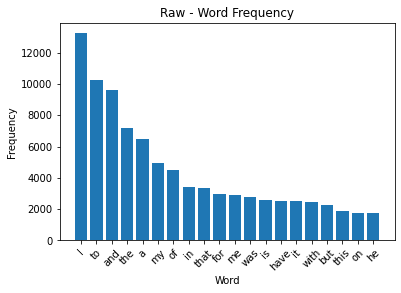

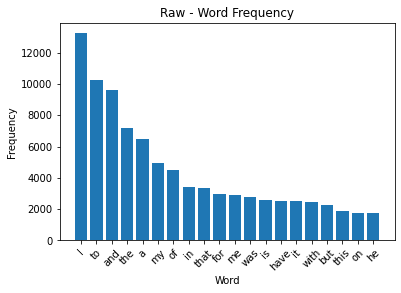

In [17]:
from collections import Counter
import matplotlib.pyplot as plt

# words = [word for sentence in texts for word in sentence.split()]
raw_words = [word for sentence in df['text'] for word in sentence.split()]


# Count the frequency of each word using the Counter class
word_counts = Counter(raw_words)

# Get the top 20 most common words
raw_common_words = word_counts.most_common(20)

# Extract the words and counts into separate lists
raw_words, counts = zip(*raw_common_words)

# Create a bar plot of the word frequency
plt.bar(raw_words, counts)
plt.title('Raw - Word Frequency')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [73]:
print("most 20 words for the raw text", raw_common_words)

most 20 words for the raw text [('I', 13232), ('to', 10249), ('and', 9579), ('the', 7205), ('a', 6461), ('my', 4966), ('of', 4479), ('in', 3393), ('that', 3345), ('for', 2996), ('me', 2926), ('was', 2793), ('is', 2601), ('have', 2547), ('it', 2509), ('with', 2472), ('but', 2274), ('this', 1906), ('on', 1756), ('he', 1734)]


In [ ]:
most 5 words for the raw text [('I', 13232), ('to', 10249), ('and', 9579), ('the', 7205), ('a', 6461)

cleaned text

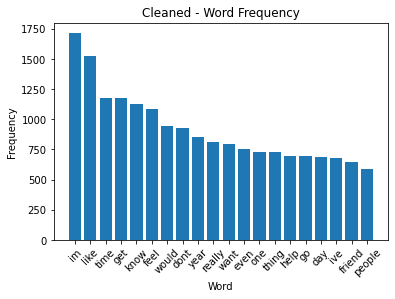

In [76]:
from collections import Counter
import matplotlib.pyplot as plt

cleaned_words = [word for sentence in cleaned_texts for word in sentence.split()]


# Count the frequency of each word using the Counter class
cleaned_word_counts = Counter(cleaned_words)

# Get the top 20 most common words
cleaned_common_words = cleaned_word_counts.most_common(20)

# Extract the words and counts into separate lists
cleaned_words, counts = zip(*common_words)

# Create a bar plot of the word frequency
plt.bar(cleaned_words, counts)
plt.title('Cleaned - Word Frequency')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [78]:
print("most 20 words for the clean text", cleaned_common_words)

most 20 words for the clean text [('im', 1716), ('like', 1524), ('time', 1178), ('get', 1174), ('know', 1128), ('feel', 1084), ('would', 943), ('dont', 927), ('year', 855), ('really', 813), ('want', 793), ('even', 752), ('one', 731), ('thing', 726), ('help', 697), ('go', 693), ('day', 686), ('ive', 679), ('friend', 645), ('people', 591)]


#### word cloud

In [45]:
stressed = []
not_stressed = []
for idx, i in enumerate(labels):
    if i==1:
        stressed.append(cleaned_texts[idx])
    else:
        not_stressed.append(cleaned_texts[idx])

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

def generate_wordcloud(data, title):
    
    # tokenize the text
    datas = [d for corpus in data for d in corpus.split() ]
    
    # Convert the list of words into a dictionary of word frequencies
    frequencies = dict(Counter(datas))

    # Generate the word cloud
    wc = WordCloud(width=400, height=330, max_words=150, colormap="Dark2").generate_from_frequencies(frequencies)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()
    
    return wc


In [25]:
cleaned_texts[0]

'said felt way suggeted go rest trigger ahead youire hypocondriac like decide look feeling doom hope maybe getting sucked rabbit hole ludicrous conspiracy stupid psychic test new age b something could even laugh road ended reading sense doom indicative various health ailment one prone top doom gloomi fn worried heart happen physical 48 hour'

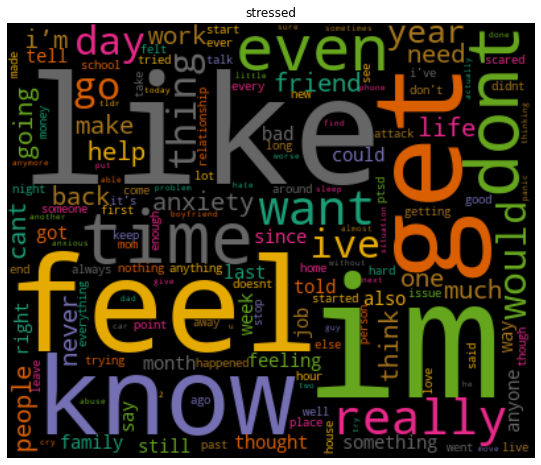

In [50]:
wc_s = generate_wordcloud(stressed, 'stressed')

In [54]:
print(wc_s.words_.keys())


dict_keys(['im', 'like', 'feel', 'get', 'know', 'time', 'dont', 'even', 'really', 'want', 'day', 'ive', 'thing', 'would', 'go', 'year', 'anxiety', 'i’m', 'help', 'one', 'cant', 'going', 'back', 'friend', 'work', 'make', 'think', 'life', 'need', 'never', 'people', 'much', 'feeling', 'still', 'got', 'something', 'also', 'job', 'could', 'month', 'way', 'week', 'family', 'thought', 'anyone', 'since', 'tell', 'told', 'bad', 'say', 'right', 'last', 'anything', 'see', 'every', 'home', 'getting', 'didnt', 'trying', 'always', 'lot', 'talk', 'take', 'relationship', 'said', 'come', 'started', 'hard', 'don’t', 'someone', 'night', 'happened', 'everything', 'good', 'keep', 'well', 'school', 'past', 'felt', 'attack', 'it’s', 'place', 'nothing', 'love', 'first', 'money', 'made', 'went', 'mom', 'point', 'i’ve', 'away', 'live', 'stop', 'around', 'issue', 'hour', 'scared', 'house', 'else', 'ago', 'ptsd', 'person', 'end', 'start', 'doesnt', 'though', 'tried', 'ever', 'new', 'enough', 'leave', 'long', 'boy

In [56]:
len(['im', 'like', 'feel', 'get', 'know', 'time', 'dont', 'even', 'really', 'want'])

11

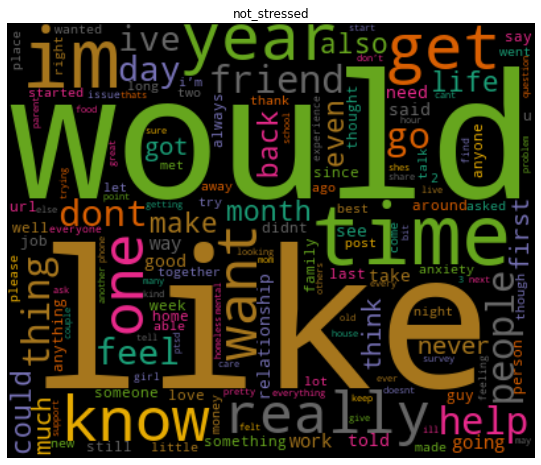

In [57]:
wc_ns = generate_wordcloud(not_stressed, 'not_stressed')

In [58]:
print(wc_ns.words_.keys())


dict_keys(['like', 'would', 'time', 'im', 'year', 'get', 'know', 'one', 'really', 'want', 'friend', 'people', 'help', 'thing', 'go', 'dont', 'feel', 'ive', 'day', 'month', 'make', 'life', 'could', 'also', 'even', 'back', 'never', 'think', 'got', 'first', 'much', 'going', 'work', 'way', 'need', 'told', 'take', 'see', 'relationship', 'said', 'good', 'something', 'still', 'u', 'thought', 'week', 'love', 'didnt', 'since', 'well', 'say', 'anything', 'anyone', 'someone', 'url', 'guy', 'family', 'around', 'always', 'person', 'last', 'job', 'home', 'together', 'lot', 'went', 'talk', 'anxiety', 'ago', 'started', 'long', 'little', 'best', 'wanted', 'i’m', 'thank', 'let', 'night', 'please', 'come', 'post', 'new', 'away', 'made', 'asked', 'place', 'try', 'able', 'though', 'two', '2', 'met', 'money', 'right', 'everyone', 'feeling', 'girl', 'find', 'experience', 'issue', 'everything', 'sure', 'many', 'survey', '3', 'every', 'may', 'looking', 'old', 'getting', 'cant', 'shes', 'ptsd', 'don’t', 'house'

In [60]:
len(['like', 'would', 'time', 'im', 'year', 'get', 'know', 'one', 'really', 'want', ])

10

### Performing sentiment analysis:
#### checking only the polarity, i.e., how much a text is positive or negative, is sufficient. 

In [18]:
cleaned_texts_df = pd.DataFrame(cleaned_texts, columns=['text'])

In [19]:
cleaned_texts_df['post_id'] = df['post_id'].values

In [20]:
cleaned_texts_df['labels'] = labels.values

In [21]:
from textblob import TextBlob

cleaned_texts_df['polarity'] = [TextBlob(t).sentiment.polarity for t in cleaned_texts_df['text'] ]


In [31]:
print("3 Random Posts with Highest Polarity:\n")
for index,post in enumerate(cleaned_texts_df.iloc[cleaned_texts_df['polarity'].sort_values(ascending=False)[:3].index]['text']):
    print('post {}:\n'.format(index+1),post)
    print()

3 Random Posts with Highest Polarity:

post 1:
 reason protect awesome folk know people request monies truly need always take advantage generosity others please let’s stick food hygiene item guy help kindest generous redditors glinda

post 2:
 woman ever treated respect nan died month ago household screwing u there nothing refuse seek help never change want move nowhere go job money best wait someone dy suppose

post 3:
 relying app depended wifi call text became hassle tried get obama phone denied couldnt provide bill name address course dont address im homeless suppose get job dont phone one reached whereverwhenever system designed perfectly



In [32]:
print("3 Random Posts with Lowest Polarity:")
for index,post in enumerate(cleaned_texts_df.iloc[cleaned_texts_df['polarity'].sort_values(ascending=True)[:3].index]['text']):
    print('post {}:\n'.format(index+1),post)
    print()

3 Random Posts with Lowest Polarity:
post 1:
 discharged told nurse health clinic though got sutured cant deal ptsd anymore feel awful injection flupentixol im suicidal im suicidal keep thinking go time cry help

post 2:
 drove 10 minute home fiance phone helping count breathing got home collapsed couldnt breathe neck chest hurt hysterical

post 3:
 quite annoying get diarrhea get panic attack need shower thoroughly get cleaned disgusting also get hypochondriac thought sometimes panic badly call 911 ambulance sent thankfully done today annoying fightorflight response



In [16]:
cleaned_texts_df['sentiment'] = cleaned_texts_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
cleaned_texts_df.head()

,text,post_id,labels,polarity,sentiment
0,said felt way suggeted go rest trigger ahead y...,8601tu,1,0.022727,0.022727
1,hey rassistance sure right place post go im c...,8lbrx9,0,0.360714,0.360714
2,mom hit newspaper shocked would know dont like...,9ch1zh,1,0.049394,0.049394
3,met new boyfriend amazing kind sweet good stud...,7rorpp,1,0.161810,0.161810
4,october domestic violence awareness month dome...,9p2gbc,1,-0.146154,-0.146154


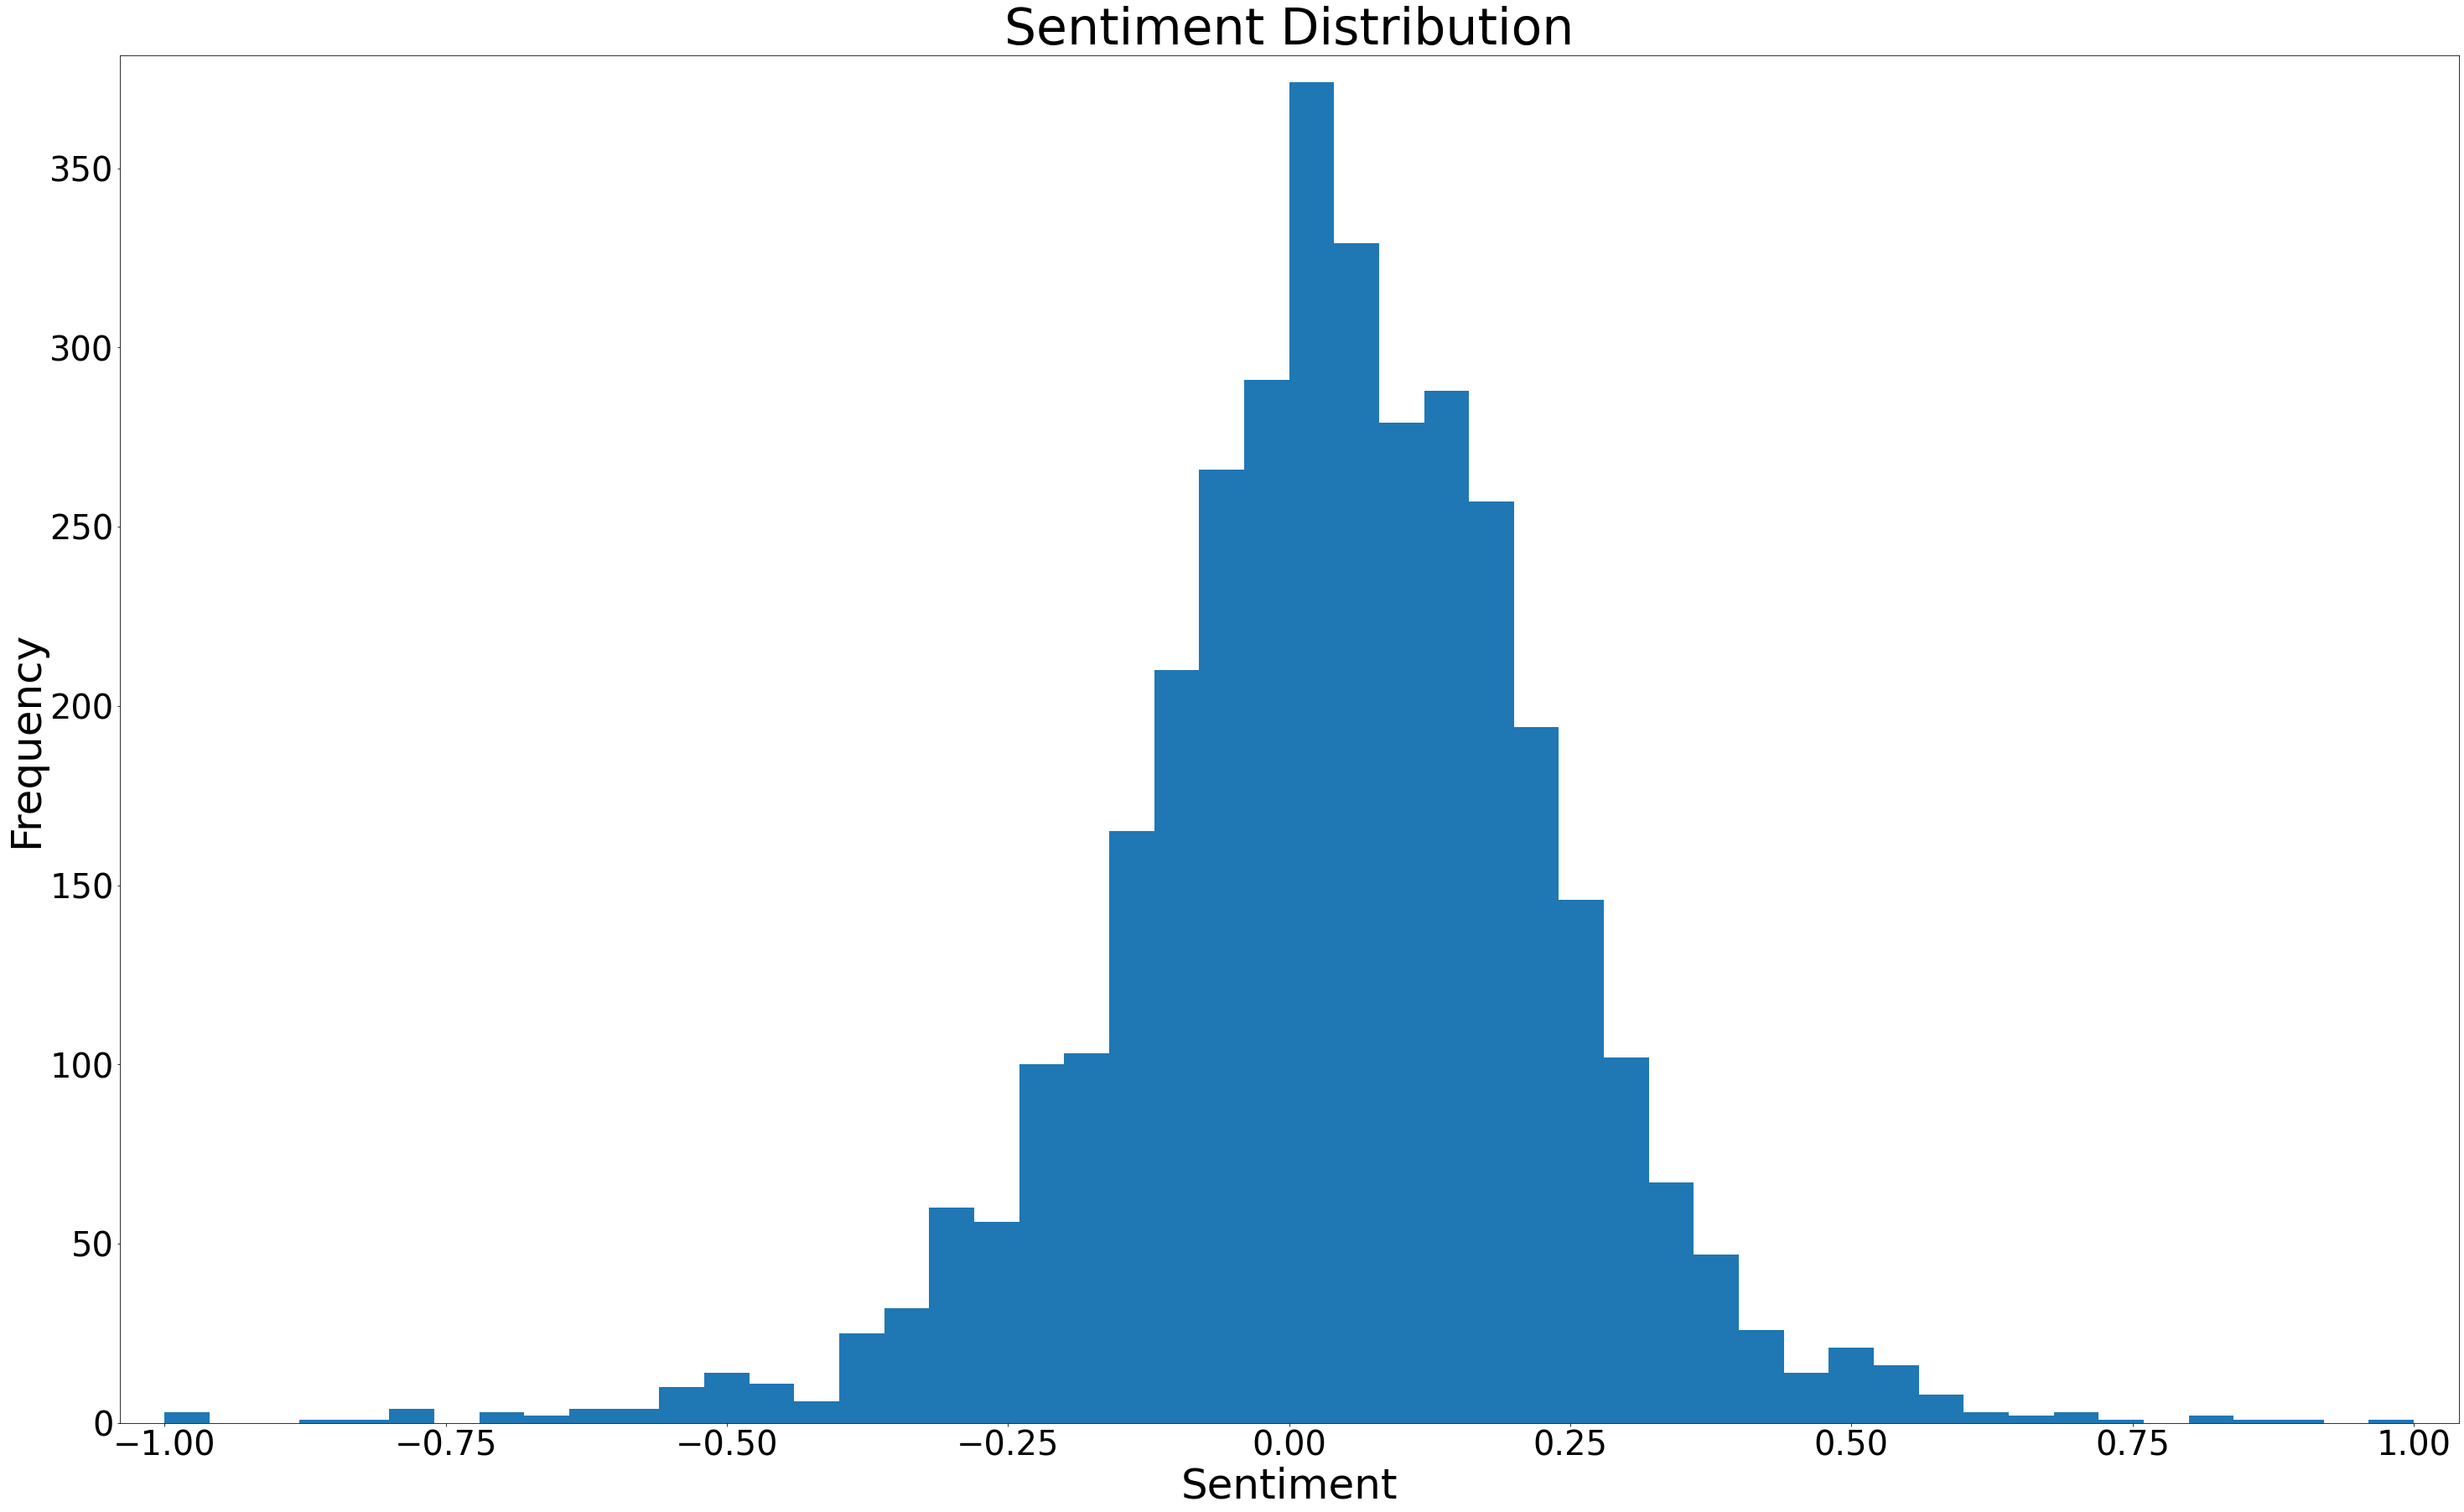

In [35]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

### Calculating summary statistics for text

<AxesSubplot:>

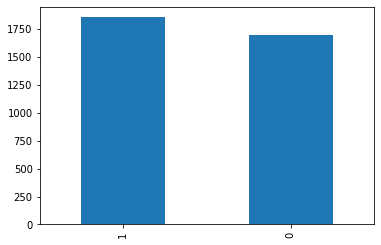

In [222]:
df['label'].value_counts().plot(kind='bar')

### Topic Modeling

Topic modeling is a method of uncovering the underlying themes or topics in a collection of documents. It is a way of automatically organizing and summarizing large volumes of text data by identifying common patterns and grouping them together into topics.

There are various algorithms and techniques that can be used for topic modeling, but the most common approach is to use unsupervised machine learning techniques, such as latent Dirichlet allocation (LDA). LDA is a generative probabilistic model that assumes that each document in a corpus is a mixture of a small number of topics, and each topic is a distribution over a fixed vocabulary of words.

To perform topic modeling, the first step is to preprocess the text data, which typically involves cleaning and normalizing the text, and then representing it in a numerical form that can be processed by a machine learning algorithm. This is often done by creating a term-document matrix, where each row represents a unique word in the vocabulary and each column represents a document in the corpus.

Once the data is prepared, the next step is to fit an LDA model to the data and tune the model parameters to identify the desired number of topics. This can be done using techniques such as cross-validation or information criteria.

Once the model is trained, it can be used to discover the underlying topics in the text data and to predict the topic distribution for new documents. Topic modeling can be used for a wide range of applications, including document classification, information retrieval, and text summarization.

##### CountVectorizer

Count vectorization is a method of creating a vocabulary of words from a set of documents and then representing each document as a vector of word counts. It is a simple and efficient way of encoding text data, but it does not take into account the frequency of words across the entire corpus.

In general, count vectorization is a good choice for LDA if the goal is to identify the most common words and phrases in a set of documents.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)
tf = tf_vectorizer.fit_transform(cleaned_texts_df.text.values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()

doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

/Users/Jeff/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,100,12,15,16,18,20,30,able,absolutely,...,wrong,x200b,year,yes,yesterday,yet,you,young,younger,youre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3549,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Latent Dirichlet Allocation (LDA) Topic Modeling

 LDA is a generative probabilistic model that assumes that each document in a corpus is a mixture of a small number of topics, and each topic is a distribution over a fixed vocabulary of words.
 
We will now apply Latent Dirichlet Allocation (LDA) to our preprocessed dataset to identify the topics present in the corpus. The model will generate 10 topics (n_components). After creating the model, we will create a function to display the identified topics, each of which will include 10 words. This function will require three inputs: the LDA model, the feature names from the document-term matrix, and the number of words per topic.

In [46]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=10, 
                                      learning_method='online', max_iter=500, random_state=0).fit(tf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
like anxiety day feel time attack really feeling im panic
Topic 1:
im like feel dont know want even get cant really
Topic 2:
don back ve would it time day night said got
Topic 3:
anxiety ptsd ive issue life mental symptom health sex hope
Topic 4:
would help anyone people car could know really need thank
Topic 5:
job get work im money phone month pay time day
Topic 6:
year friend time month ago relationship first one abuse last
Topic 7:
house mom home dad family go he brother told live
Topic 8:
therapy therapist sister need message response support take care also
Topic 9:
survey url study treatment please may interested 18 take link


display the lda results

In [20]:
# pip install gensim

In [38]:
data_ready = [i.split() for i in cleaned_texts_df.text]

In [40]:
import gensim
from pprint import pprint

# Create Dictionary
id2word = gensim.corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.015*"time" + 0.014*"know" + 0.012*"ive" + 0.012*"get" + 0.011*"year" + '
  '0.011*"really" + 0.009*"thing" + 0.009*"like" + 0.009*"friend" + '
  '0.008*"make"'),
 (1,
  '0.016*"help" + 0.015*"sure" + 0.014*"school" + 0.012*"need" + 0.010*"job" + '
  '0.010*"would" + 0.009*"thank" + 0.009*"looking" + 0.008*"rent" + '
  '0.008*"much"'),
 (2,
  '0.046*"im" + 0.028*"feel" + 0.027*"like" + 0.018*"also" + 0.017*"cant" + '
  '0.017*"work" + 0.014*"life" + 0.012*"feeling" + 0.012*"last" + '
  '0.012*"keep"'),
 (3,
  '0.028*"one" + 0.026*"week" + 0.019*"something" + 0.016*"could" + '
  '0.016*"two" + 0.015*"much" + 0.012*"mind" + 0.011*"getting" + 0.011*"hard" '
  '+ 0.010*"ptsd"')]


###### 1. What is the Dominant topic and its percentage contribution in each document

In [41]:
# data = cleaned_texts_df.text.values.tolist()
# data = [i.split() for i in cleaned_texts_df.text.values.tolist()]

In [35]:
# data[0]

In [36]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    
    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)



In [42]:

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)


/var/folders/8b/_p4_5dy97kxdg3xtgxsz0khw0000gn/T/ipykernel_17743/2521051077.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/8b/_p4_5dy97kxdg3xtgxsz0khw0000gn/T/ipykernel_17743/2521051077.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3,0.5245,"one, week, something, could, two, much, mind, getting, hard, ptsd","[said, felt, way, suggeted, go, rest, trigger, ahead, youire, hypocondriac, like, decide, look, ..."
1,1,1,0.7881,"help, sure, school, need, job, would, thank, looking, rent, much","[hey, rassistance, sure, right, place, post, go, im, currently, student, intern, sandia, nationa..."
2,2,0,0.6016,"time, know, ive, get, year, really, thing, like, friend, make","[mom, hit, newspaper, shocked, would, know, dont, like, play, hitting, smacking, striking, hitti..."
3,3,0,0.7582,"time, know, ive, get, year, really, thing, like, friend, make","[met, new, boyfriend, amazing, kind, sweet, good, student, like, thing, family, like, dont, feel..."
4,4,2,0.6333,"im, feel, like, also, cant, work, life, feeling, last, keep","[october, domestic, violence, awareness, month, domestic, violence, survivor, still, struggling,..."
5,5,0,0.5333,"time, know, ive, get, year, really, thing, like, friend, make","[think, doesnt, want, put, effort, relationship, work, difficult, work, relationship, doesnt, ma..."
6,6,0,0.7150,"time, know, ive, get, year, really, thing, like, friend, make","[big, company, luckily, didnt, see, time, acted, though, didnt, exist, tried, talk, update, preg..."
7,7,2,0.7231,"im, feel, like, also, cant, work, life, feeling, last, keep","[cleared, okay, monday, thinking, human, brain, work, tripped, got, worried, thinking, brain, wo..."
8,8,2,0.6294,"im, feel, like, also, cant, work, life, feeling, last, keep","[actually, give, assistant, half, emergency, fee, come, help, sometimes, feel, unsafe, driving, ..."
9,9,0,0.3773,"time, know, ive, get, year, really, thing, like, friend, make","[feel, like, street, life, fucked, head, there, much, dont, even, know, talk, anymore, hold, shi..."


###### 2. The most representative sentence for each topic

In [43]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)


,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0,0.9405,"time, know, ive, get, year, really, thing, like, friend, make","[asked, three, time, happened, third, time, cried, went, home, month, later, still, dont, talk, ..."
1,1,0.9855,"help, sure, school, need, job, would, thank, looking, rent, much","[survey, may, take, 3040, minute, complete, response, survey, item, anonymous, kept, confidentia..."
2,2,0.8179,"im, feel, like, also, cant, work, life, feeling, last, keep","[every, single, day, im, getting, fb, message, saying, combination, following, im, feeling, sad,..."
3,3,0.8700,"one, week, something, could, two, much, mind, getting, hard, ptsd","[seated, throne, wire, mermaid, tending, pyre, golem, force, wall, touch, lemur, gaze, dusk, dan..."


The "Representative Text" column in the given results shows examples of sentences that are representative of each topic. For example, for topic 0, the representative text is:

"[asked, three, time, happened, third, time, cried, went, home, month, later, still, dont, talk, anyone, two, year, husband, dont, understand, im, feeling, like, im, alone, any, else, feel, way, feel, isolated, isolated, like, wall, invisible]"

This sentence mentions several keywords that are associated with topic 0, such as "time," "know," "ive," "get," "year," "really," "thing," "like," "friend," and "make." This suggests that the sentence is related to topic 0 and may be representative of the theme or content of that topic.

Similarly, for topic 1, the representative text is:

"[survey, may, take, 3040, minute, complete, response, survey, item, anonymous, kept, confidential, survey, conducted, interest, improving, quality, care, health, services, provided, health, care, provider, thank, advance, participation]"

This sentence mentions several keywords that are associated with topic 1, such as "help," "sure," "school," "need," "job," "would," "thank," "looking," "rent," and "much." This suggests that the sentence is related to topic 1 and may be representative of the theme or content of that topic.

In [80]:
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'


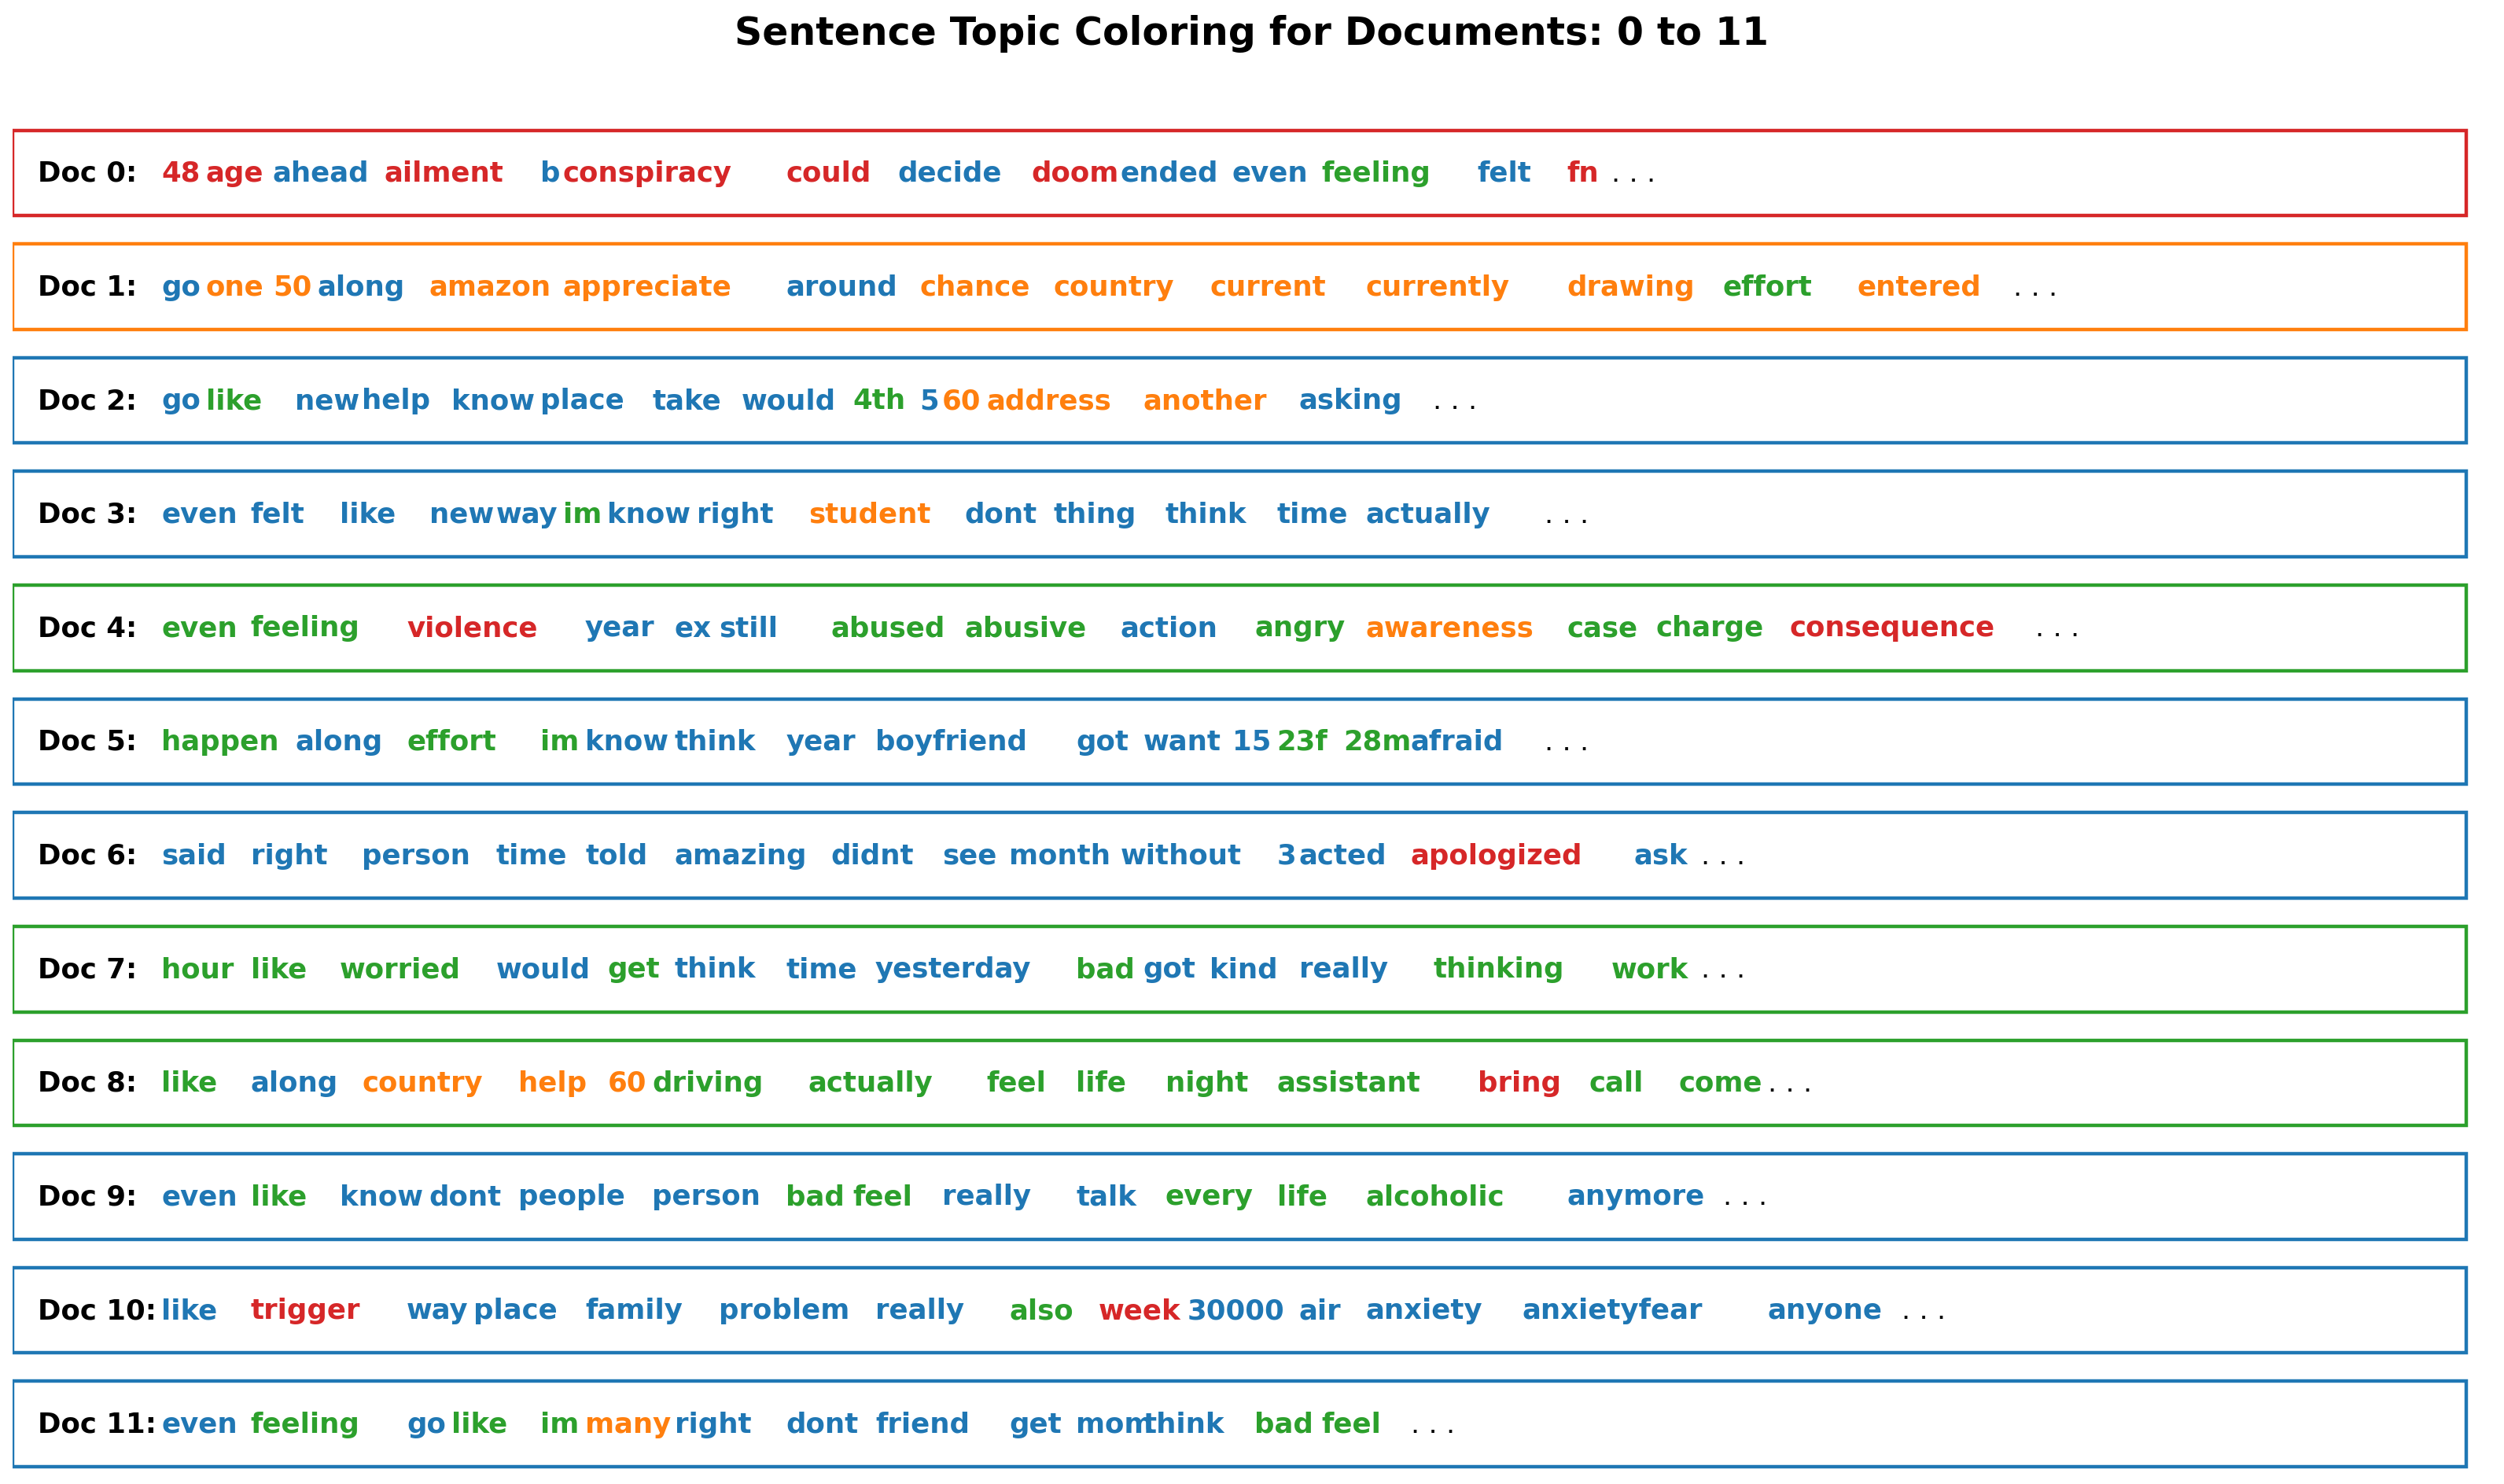

In [81]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()

#### Which topics are most frequently mentioned or discussed in the documents?


In [82]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

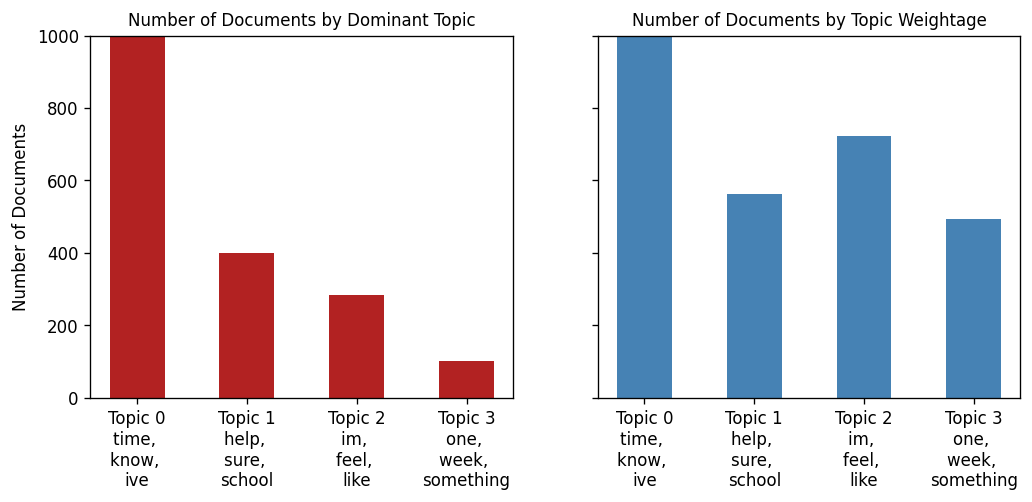

In [83]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [90]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
vis = gensimvis.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/Users/Jeff/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/Jeff/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/Jeff/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/Jeff/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/Jeff/opt/anaconda3/lib/python3.9/site-

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.302812 -0.085892       1        1  49.954082
2      0.022898  0.276770       2        1  20.298553
1     -0.104887 -0.193887       3        1  15.764738
3     -0.220823  0.003010       4        1  13.982627, topic_info=           Term         Freq        Total Category  logprob  loglift
69           im  1675.000000  1675.000000  Default  30.0000  30.0000
166        feel   957.000000   957.000000  Default  29.0000  29.0000
26         like  1459.000000  1459.000000  Default  28.0000  28.0000
31          one   734.000000   734.000000  Default  27.0000  27.0000
364        week   524.000000   524.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
31          one   568.554852   734.630350   Topic4  -3.5746   1.7111
355        much   305.938673   485.183381   Topic4  -4.1943   1.5062
841    remember   108.988125   166.464209   Topic4  -5.2264   1.5438
164  experience    87.451474   142.020172   Topic4  -5.4466   1.4825
310        life    87.058660   492.435373   Topic4  -5.4511   0.2346

[192 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
649       4  0.995418    abuse
1531      1  0.473705   advice
1531      3  0.523568   advice
1         4  0.997945      age
754       2  0.993230    alone
...     ...       ...      ...
97        3  0.988623  working
98        1  0.691506    would
98        3  0.309176    would
146       1  0.947720     year
146       3  0.051569     year

[191 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4])

# Modelling

extract features

In [92]:
data_ready[0][:5]

['said', 'felt', 'way', 'suggeted', 'go']

using countvectorizer with LDA

In [155]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a CountVectorizer object to convert the documents into a bag of words
cv_vectorizer = CountVectorizer(max_df=0.5, min_df=2, ngram_range=(1,1), max_features=1000)
X_train_cv = cv_vectorizer.fit_transform(cleaned_texts_df.text.values)

# Create an LDA model and fit it to the bag of words
# lda = LatentDirichletAllocation(n_components=5, max_iter=50, learning_method='online')
lda = LatentDirichletAllocation(n_components=10, max_iter=50, learning_method='online')
cv_X_lda = lda.fit_transform(X_train_cv)


# The resulting LDA model will have two topics, and each document will be represented by
# a 2-dimensional vector indicating the strength of each topic in the document.


In [156]:
for i,arr in enumerate(lda.components_):
    
    print(f'TOP 15 WORDS FOR TOPIC #{i}')
    print([cv_vectorizer.get_feature_names()[i] for i in arr.argsort()[-15:]]) 
    print('\n\n')

TOP 15 WORDS FOR TOPIC #0
['you', 'thought', 'last', 'email', 'come', 'hit', 're', 'became', 'drunk', 'drink', 'felt', 'didn', 'called', 'don', 've']



TOP 15 WORDS FOR TOPIC #1


/Users/Jeff/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['month', 'help', 'work', 'need', 'best', 'pay', 'ive', 'get', 'friend', 'working', 'school', 'year', 'money', 'time', 'im']



TOP 15 WORDS FOR TOPIC #2
['start', 'ive', 'help', 'due', 'work', 'like', 'going', 'need', 'go', 'cant', 'want', 'know', 'get', 'dont', 'im']



TOP 15 WORDS FOR TOPIC #3
['night', 'back', 'room', 'started', 'week', 'time', 'went', 'work', 'mom', 'hour', 'day', 'go', 'home', 'friend', 'got']



TOP 15 WORDS FOR TOPIC #4
['etc', 'back', 'also', 'couple', 'make', 'going', 'even', 'house', 'week', 'next', 'night', 'family', 'day', 'get', 'job']



TOP 15 WORDS FOR TOPIC #5
['18', 'abuse', 'bill', 'since', '10', 'age', 'treatment', 'study', 'time', 'life', 'child', 'month', 'old', 'ago', 'year']



TOP 15 WORDS FOR TOPIC #6
['depression', 'therapist', 'shes', 'symptom', 'person', 'one', 'really', 'like', 'people', 'help', 'im', 'ptsd', 'thing', 'ive', 'anxiety']



TOP 15 WORDS FOR TOPIC #7
['went', 'well', 'one', 'know', 'first', 'never', 'month', 'asked', 'wante

# ML

In [142]:
y = labels.values

In [255]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(cv_X_lda, y, test_size=0.2, random_state=0)


custom codes

In [22]:
from sklearn.metrics import f1_score

def make_f1(model,X_test, y_test, y_pred):
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')

    print("F1 score:", f1)
    return f1


In [62]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns

def make_confusionmat_classreport(model, X_test, y_test, y_pred, labels=[0,1], target_names=['No stress', 'Stress']):
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Create a confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion matrix:\n", conf_matrix)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=target_names)
#                               display_labels=model.classes_)
    disp.plot()

    plt.show()

    # Create a classification report
    class_report = classification_report(y_test, y_pred, 
                                    labels=labels,
                                   target_names=target_names,
                                   output_dict=True)
    print("Classification report:\n", class_report)
    
    # .iloc[:-1, :] to exclude support
    sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True)


In [43]:
from sklearn.model_selection import cross_val_score
import numpy as np 

def cross_val(model, X, y):

    # Perform 5-fold cross-validation, using the F1 score as the evaluation metric
    scores = cross_val_score(model, X, y, cv=5, scoring='f1_weighted')

    # Print the mean and standard deviation of the scores
    print("Mean score:", np.mean(scores))
    print("Standard deviation:", np.std(scores))


----

### Using only countvectorizer as a feature extractor

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a CountVectorizer object to convert the documents into a bag of words
raw_cv_vectorizer = CountVectorizer(max_df=0.5, min_df=2, ngram_range=(1,1), max_features=1000)

# raw_cv_vectorizer = CountVectorizer() #(max_df=0.5, min_df=2, ngram_range=(1,1), max_features=1000)
X_train_raw_cv = raw_cv_vectorizer.fit_transform(cleaned_texts_df.text.values)



In [77]:
y = labels.values

In [28]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train_raw_cv, y, test_size=0.2, random_state=0)


In [40]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC

logistic regression

In [78]:
# Train a logistic regression model on the training data
logreg = LogisticRegression(max_iter=100, C=0.1, solver='lbfgs')
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

# Evaluate the classifier on the test data
logreg_accuracy = logreg.score(X_test, y_test)
print("Accuracy:", logreg_accuracy)

LogisticRegression(C=0.1)

Accuracy: 0.7355836849507735


In [79]:
make_f1(logreg, X_test, y_test, logreg_pred)

F1 score: 0.7355648545622926


0.7355648545622926

Confusion matrix:
 [[263  88]
 [100 260]]


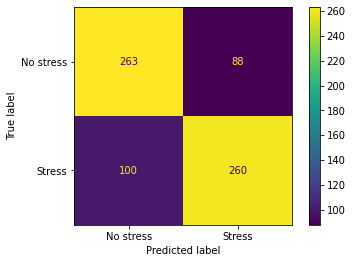

Classification report:
 {'No stress': {'precision': 0.7245179063360881, 'recall': 0.7492877492877493, 'f1-score': 0.7366946778711485, 'support': 351}, 'Stress': {'precision': 0.7471264367816092, 'recall': 0.7222222222222222, 'f1-score': 0.7344632768361581, 'support': 360}, 'accuracy': 0.7355836849507735, 'macro avg': {'precision': 0.7358221715588487, 'recall': 0.7357549857549858, 'f1-score': 0.7355789773536533, 'support': 711}, 'weighted avg': {'precision': 0.7359652635236936, 'recall': 0.7355836849507735, 'f1-score': 0.7355648545622926, 'support': 711}}


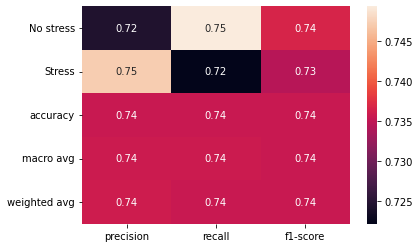

In [80]:
make_confusionmat_classreport(logreg, X_test, y_test, logreg_pred)

In [81]:
cross_val(logreg,X_train, y_train)

Mean score: 0.7248313709407341
Standard deviation: 0.009932690473933414


In [5]:
0.7248313*100

72.48312999999999

72.48312999999999

xgboost regression

In [66]:
# Train an XGBoost model on the training data
xgb = XGBClassifier(max_depth=3, min_child_weight=1, subsample=0.5, colsample_bytree=0.5, learning_rate=0.1)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
# Evaluate the classifier on the test data
xgb_accuracy = xgb.score(X_test, y_test)
print("Accuracy:", xgb_accuracy)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Accuracy: 0.7243319268635724


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Accuracy: 0.7243319268635724


In [67]:
0.7243319*100

72.43319

72.43319

In [68]:
make_f1(xgb, X_test, y_test, xgb_pred)

F1 score: 0.7242282430131172


0.7242282430131172

F1 score: 0.7242282430131172


0.7242282430131172

In [69]:
0.72422*100

72.422

72.422

Confusion matrix:
 [[248 103]
 [ 93 267]]
Confusion matrix:
 [[248 103]
 [ 93 267]]


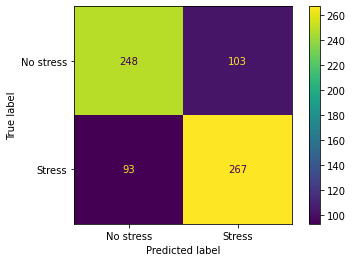

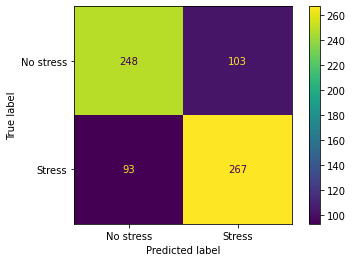

Classification report:
 {'No stress': {'precision': 0.7272727272727273, 'recall': 0.7065527065527065, 'f1-score': 0.7167630057803468, 'support': 351}, 'Stress': {'precision': 0.7216216216216216, 'recall': 0.7416666666666667, 'f1-score': 0.7315068493150684, 'support': 360}, 'accuracy': 0.7243319268635724, 'macro avg': {'precision': 0.7244471744471744, 'recall': 0.7241096866096866, 'f1-score': 0.7241349275477076, 'support': 711}, 'weighted avg': {'precision': 0.7244114079557117, 'recall': 0.7243319268635724, 'f1-score': 0.7242282430131172, 'support': 711}}
Classification report:
 {'No stress': {'precision': 0.7272727272727273, 'recall': 0.7065527065527065, 'f1-score': 0.7167630057803468, 'support': 351}, 'Stress': {'precision': 0.7216216216216216, 'recall': 0.7416666666666667, 'f1-score': 0.7315068493150684, 'support': 360}, 'accuracy': 0.7243319268635724, 'macro avg': {'precision': 0.7244471744471744, 'recall': 0.7241096866096866, 'f1-score': 0.7241349275477076, 'support': 711}, 'weight

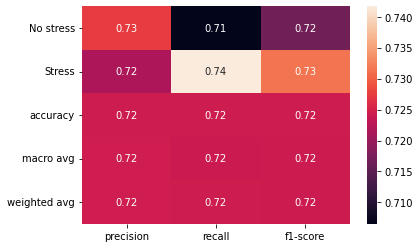

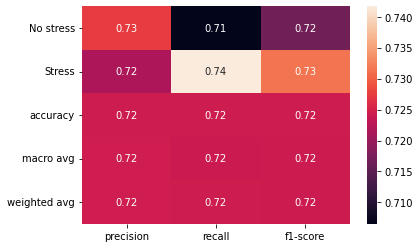

In [70]:
make_confusionmat_classreport(xgb, X_test, y_test, xgb_pred)

In [50]:
cross_val(xgb,X_train, y_train)

Mean score: 0.6996230272541595
Standard deviation: 0.014029873081655838
Mean score: 0.6996230272541595
Standard deviation: 0.014029873081655838


In [53]:
 0.69962*100

69.962

69.962

svm

In [71]:
# Train an SVM model on the training data
svm = SVC(C=0.1, kernel='linear', tol=1e-3)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
# Evaluate the classifier on the test data
svm_accuracy = svm.score(X_test, y_test)
print("Accuracy:", svm_accuracy)

SVC(C=0.1, kernel='linear')

SVC(C=0.1, kernel='linear')

Accuracy: 0.7257383966244726
Accuracy: 0.7257383966244726


In [72]:
0.725738*100

72.5738

72.5738

In [73]:
make_f1(svm, X_test, y_test, svm_pred)

F1 score: 0.7257383966244726
F1 score: 0.7257383966244726


0.7257383966244726

0.7257383966244726

In [74]:
0.725738*100

72.5738

72.5738

Confusion matrix:
 [[258  93]
 [102 258]]
Confusion matrix:
 [[258  93]
 [102 258]]


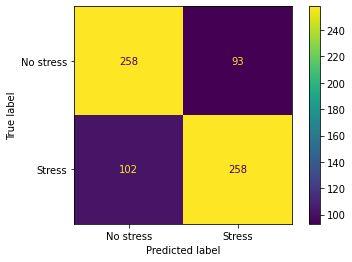

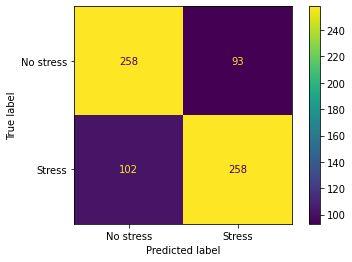

Classification report:
 {'No stress': {'precision': 0.7166666666666667, 'recall': 0.7350427350427351, 'f1-score': 0.7257383966244726, 'support': 351}, 'Stress': {'precision': 0.7350427350427351, 'recall': 0.7166666666666667, 'f1-score': 0.7257383966244726, 'support': 360}, 'accuracy': 0.7257383966244726, 'macro avg': {'precision': 0.7258547008547009, 'recall': 0.7258547008547009, 'f1-score': 0.7257383966244726, 'support': 711}, 'weighted avg': {'precision': 0.7259710050849293, 'recall': 0.7257383966244726, 'f1-score': 0.7257383966244726, 'support': 711}}
Classification report:
 {'No stress': {'precision': 0.7166666666666667, 'recall': 0.7350427350427351, 'f1-score': 0.7257383966244726, 'support': 351}, 'Stress': {'precision': 0.7350427350427351, 'recall': 0.7166666666666667, 'f1-score': 0.7257383966244726, 'support': 360}, 'accuracy': 0.7257383966244726, 'macro avg': {'precision': 0.7258547008547009, 'recall': 0.7258547008547009, 'f1-score': 0.7257383966244726, 'support': 711}, 'weight

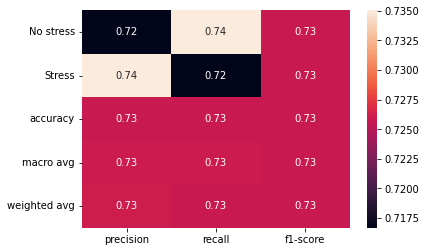

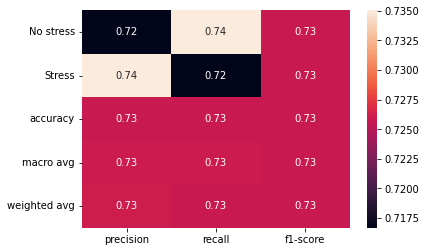

In [75]:
make_confusionmat_classreport(svm, X_test, y_test, svm_pred)

In [76]:
cross_val(svm,X_train, y_train)

Mean score: 0.7106232059466399
Standard deviation: 0.015894813270916876
Mean score: 0.7106232059466399
Standard deviation: 0.015894813270916876


In [61]:
 0.7106232*100

71.06232

71.06232

## save model

In [82]:
import joblib

joblib.dump(raw_cv_vectorizer, "deploy/saved_models/raw_cv_vectorizer.pkl")
joblib.dump(logreg, "deploy/saved_models/logreg.pkl")


['deploy/saved_models/raw_cv_vectorizer.pkl']

['deploy/saved_models/logreg.pkl']

In [61]:
import joblib

# load saved models
vec = joblib.load("deploy/saved_models/raw_cv_vectorizer.pkl")
model = joblib.load("deploy/saved_models/logreg.pkl")

In [52]:
from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re, string, nltk


# Lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_words(words):
    
    return " ".join([lemmatizer.lemmatize(word) for word in words])


def text_prepare(corpus):
    
    # split into tokens
    sentence_splitted = corpus.split()
    
     # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation)) # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in sentence_splitted]
    
    # turn token to lowercase, Remove stop words
    filtered_tokens = [token.lower() for token in tokens if token.lower() not in stopwords.words('english')]
    
    # Lemmatize the filtered tokens
    lemmatized_tokens = lemmatize_words(filtered_tokens)

    # return the filtered tokens
    return lemmatized_tokens


# Scrape Reddit

how to create your own reddit app.

1. {https://github.com/reddit-archive/reddit/wiki/OAuth2#getting-started }https://www.reddit.com/prefs/apps

2. choose "Script app: Runs on hardware you control, such as your own laptop or server. Can keep a secret. Only has access to your account."

In [112]:
# pip install praw
import praw

In [39]:
user_agent = 'Comment Extraction (by u/stresspink)'
client_id = 've8faw4h86XMYGezijlPvQ'
client_secret = '04B6o4dKeL-Jl2zSHyLfMMuF5iLXhQ'

# Instantiate the Reddit API client with your credentials
reddit = praw.Reddit(client_id=client_id,
                    client_secret=client_secret, 
                    user_agent="Comment Extraction (by u/stresspink)",
                    password="qwerty123@",
                    username="stresspink" )

In [49]:
url = 'https://www.reddit.com/r/Stress/comments/fwes89/free_covid19_anxiety_eworkbook_please_take_care/'
# url = 'https://www.reddit.com/r/Stress/'
submission = reddit.submission(url=url)

corpus = []
for top_level_comment in submission.comments:
    comment = top_level_comment.body 
    corpus.append(comment)
    print(comment)
    
#     # get nested comments
#     if len(top_level_comment.replies) > 0:
#         for reply in top_level_comment.replies:
#             print(reply.body)

    
    
    

I just came here to share it and you beat me to it 😊 thanks a lot!
This workbook is great. Thank you
Thank you for this, it made me feel better 😊
I am a cancer survivor and just learned that I'm within the covid high risk group because I've had cancer. I'm really struggling with feeling vulnerable. I've always tried to be the strong one, but right now I feel really uncertain. Would this help me?
Thanks for this!
Excellent workbook from the Wellness Society. This is a helpful resource for all. Great work!


In [54]:
corpus[3]

"I am a cancer survivor and just learned that I'm within the covid high risk group because I've had cancer. I'm really struggling with feeling vulnerable. I've always tried to be the strong one, but right now I feel really uncertain. Would this help me?"

# test model

In [63]:
index_to_label = {1: 'Stress', 0: 'Not Stressed'}

In [55]:
dredd = text_prepare(corpus[3])

In [59]:
vec_transformed = vec.transform([dredd])

In [64]:
index_to_label[model.predict(vec_transformed).item()]

'Stress'

In [48]:
# fetch subreddit posts 

subreddit_name = 'Stress'

# Get a subreddit object
subreddit = reddit.subreddit(subreddit_name)

# Fetch the hottest posts in the subreddit
for submission in subreddit.hot(limit=10):
    print(submission.title)  # print the title of the post
    print(submission.url)    # Print the submission's URL
    print()

Free Covid-19 Anxiety e-Workbook. Please, take care of yourselves and of each other. See text for link.
https://www.reddit.com/r/Stress/comments/fwes89/free_covid19_anxiety_eworkbook_please_take_care/

Today I’ve been on edge all day
https://www.reddit.com/r/Stress/comments/zwy426/today_ive_been_on_edge_all_day/

Survey on Situational Stress and Music (18 and up)
https://www.reddit.com/r/Stress/comments/zwnl0z/survey_on_situational_stress_and_music_18_and_up/

Cold water immersion for stress relief
https://www.reddit.com/r/Stress/comments/zwlx5m/cold_water_immersion_for_stress_relief/

Years of waking up nauseous
https://www.reddit.com/r/Stress/comments/zwa9vg/years_of_waking_up_nauseous/

Survey on Situational Stress and Music (18 and up)
https://www.reddit.com/r/Stress/comments/zvu04i/survey_on_situational_stress_and_music_18_and_up/

Stressing is ruining my life (M28)
https://www.reddit.com/r/Stress/comments/zvtyux/stressing_is_ruining_my_life_m28/

8 Simple Tactics to improve your 

In [87]:
# fetch subreddit posts 

subreddit_name = 'Stress'

# Get a subreddit object
subreddit = reddit.subreddit(subreddit_name)

urls = {}
# Fetch the hottest posts in the subreddit
for submission in subreddit.hot(limit=10):
    print(submission.title)  # print the title of the post
    print(submission.url)    # Print the submission's URL
    urls[submission.title] = submission.url
    print()

Free Covid-19 Anxiety e-Workbook. Please, take care of yourselves and of each other. See text for link.
https://www.reddit.com/r/Stress/comments/fwes89/free_covid19_anxiety_eworkbook_please_take_care/

3 Simple Ways To Relieve Stress
https://www.reddit.com/r/Stress/comments/zy2pzb/3_simple_ways_to_relieve_stress/

I can’t seem to handle the stress from any job
https://www.reddit.com/r/Stress/comments/zxm721/i_cant_seem_to_handle_the_stress_from_any_job/

Why do I have so many symptoms for stress
https://www.reddit.com/r/Stress/comments/zxxz67/why_do_i_have_so_many_symptoms_for_stress/

How do I learn how to control/ get rid of stress when there are so many things which could be causing it
https://www.reddit.com/r/Stress/comments/zxmout/how_do_i_learn_how_to_control_get_rid_of_stress/

Today I’ve been on edge all day
https://www.reddit.com/r/Stress/comments/zwy426/today_ive_been_on_edge_all_day/

Survey on Situational Stress and Music (18 and up)
https://www.reddit.com/r/Stress/comments

In [88]:
records = {}

for k, v in urls.items():
    
    submission = reddit.submission(url=v)

    corpus = []
    
    for top_level_comment in submission.comments:
        comment = top_level_comment.body 
        corpus.append(comment)
        print(comment)
        
    records[k] = corpus

I just came here to share it and you beat me to it 😊 thanks a lot!
This workbook is great. Thank you
Thank you for this, it made me feel better 😊
I am a cancer survivor and just learned that I'm within the covid high risk group because I've had cancer. I'm really struggling with feeling vulnerable. I've always tried to be the strong one, but right now I feel really uncertain. Would this help me?
Thanks for this!
Excellent workbook from the Wellness Society. This is a helpful resource for all. Great work!
Some jobs really are unreasonable, but it also sounds like you might be taking job stress harder than necessary. See if you can notice anything about what stresses you out - like is it a certain type of work, or do you have a belief running through your mind that causes the stress?
How many jobs have you had so far? Have they all been administrative? 

I typically have to give most jobs at least 3 months to see if i truly like or dislike them. 2 weeks is usually not enough time for me 

In [89]:
records

{'Free Covid-19 Anxiety e-Workbook. Please, take care of yourselves and of each other. See text for link.': ['I just came here to share it and you beat me to it 😊 thanks a lot!',
  'This workbook is great. Thank you',
  'Thank you for this, it made me feel better 😊',
  "I am a cancer survivor and just learned that I'm within the covid high risk group because I've had cancer. I'm really struggling with feeling vulnerable. I've always tried to be the strong one, but right now I feel really uncertain. Would this help me?",
  'Thanks for this!',
  'Excellent workbook from the Wellness Society. This is a helpful resource for all. Great work!'],
 '3 Simple Ways To Relieve Stress': [],
 'I can’t seem to handle the stress from any job': ['Some jobs really are unreasonable, but it also sounds like you might be taking job stress harder than necessary. See if you can notice anything about what stresses you out - like is it a certain type of work, or do you have a belief running through your mind 